<a href="https://colab.research.google.com/github/SaxenaVaishnavi/Machine-Learning-Practices/blob/main/Week_7/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [53]:
# Common imports
import numpy as np
from pprint import pprint
from tempfile import mkdtemp
from shutil import rmtree

# to make this notebook's output stable across runs
np.random.seed(42)

#sklearn specific imports
# Dataset fetching
from sklearn.datasets import fetch_openml, fetch_20newsgroups

# Feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Pipeline utility
from sklearn.pipeline import make_pipeline, Pipeline

# Classifiers
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier,RidgeClassifier, LogisticRegression, LogisticRegressionCV, RidgeClassifierCV

# Model selection
from sklearn.model_selection import cross_validate, RandomizedSearchCV, GridSearchCV, cross_val_predict
from sklearn.model_selection import learning_curve, train_test_split

# Evaluation metrics
from sklearn.metrics import log_loss
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, roc_curve, roc_auc_score

# Shuffling
from sklearn.utils import shuffle

# scipy
from scipy.stats import loguniform

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore all warnings (convergence..) by sklearn
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Dataset

In [6]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.to_numpy()
y = y.to_numpy()

# Problem 1
Split the dataset in the following ratio.

- Training : Take the first 70% of samples from  X  and store them in `x_train`
- Testing: Take the remaining 30% of samples from  X  and store them in `x_test`
- Store the respective labels in `y_train`, `y_test` respectively.

The last training sample is of digit __?

In [9]:
# Total samples
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
# 70% samples of total 70,000 samples
70000 * (70/100)

49000.0

In [10]:
x_train, x_test, y_train, y_test = X[:49000, :], X[49000:, :], y[:49000], y[49000:]

The last sample is of digit: 6


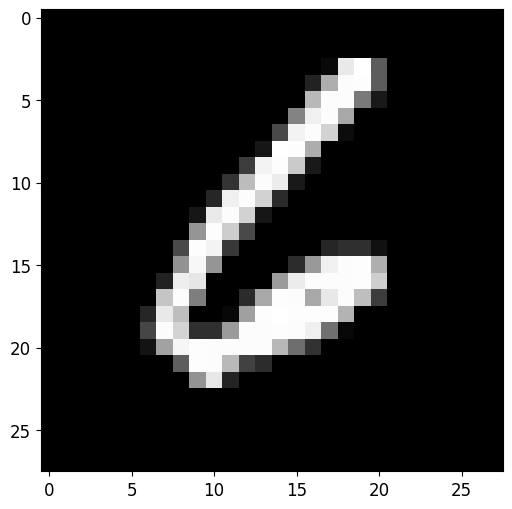

In [11]:
print('The last sample is of digit:', y_train[-1])
plt.imshow(x_train[-1, :].reshape(28,28), cmap='gray')

# Common data
Build a classifier that differentiate digit 6 from digit 9.

Steps to be followed:
- Collect all digit-6 (Positive class) and digit-9 (Negative class) images from `x_train` and stack them properly as a single datamatrix `x_train_69`.
- Keep all digit-6 images from index `0 to i` followed by digit-9 images from index `i+1 to n` (i denotes the end index of digit-6 images)
- Similarly, collect the respective labels and store it in a variable `y_train_69`
- Set the label values to 1 for positive classes and 0 for negative classes.
- Load `from sklearn.utils import shuffle`
- Shuffle the datamatrix and labels. (Set `random_state=1729`).

Create `x_test_69` and `y_test_69` by repeating the steps from 1 to 6 with required modifications

In [15]:
# TRAIN SET
idx_6 = np.where(y_train == '6')[0]
idx_9 = np.where(y_train == '9')[0]

x_train_69 = np.concatenate((x_train[idx_6], x_train[idx_9]))
y_train_69 = np.concatenate((np.ones(len(idx_6)), np.zeros(len(idx_9))))

x_train_69, y_train_69 = shuffle(x_train_69, y_train_69, random_state=1729)

In [16]:
# TEST SET
idx_6 = np.where(y_test == '6')[0]
idx_9 = np.where(y_test == '9')[0]

x_test_69 = np.concatenate((x_test[idx_6], x_test[idx_9]))
y_test_69 = np.concatenate((np.ones(len(idx_6)), np.zeros(len(idx_9))))

x_test_69, y_test_69 = shuffle(x_test_69, y_test_69, random_state=1729)

# Problem 2
What is the sum of all the labels in the vector `y_train_69` and `y_test_69`.

In [17]:
print(np.sum(y_train_69))
print(np.sum(y_test_69))

4855.0
2021.0


# Problem 3
Apply StandardScaler to all the training samples in x_train_69 and store the result in another variable (say, `x_train_69Tf`).

* What is the mean of the zeroth sample?
* What is the mean of zeroth feature?
* What is the standard deviation of the zeroth sample?
* What is the standard deviation of the zeroth feature?

Pack the answers (in order) in a tuple

In [18]:
x_train_69_Tf = StandardScaler().fit_transform(x_train_69)

print(np.mean(x_train_69_Tf[0, :]))
print(np.mean(x_train_69_Tf[:, 0]))
print(np.std(x_train_69_Tf[0, :]))
print(np.std(x_train_69_Tf[:, 0]))

0.08128379559427823
0.0
0.7358823226037738
0.0


# Problem 4

Train the `LogisticRegression` model using `SGDClassifier()` with the following common settings.

```python
No Regularization
random_state : 10
Iteration : 10
```
Capture the loss for each iteration and plot the iteration vs loss curve.

For which of the following settings, the iteration vs loss curve decreased monotonically?

1.  Set Learning rate : 0.01 and plot the curve and fit the model with `x_train_69 `

2. Set learning rate to 0.000001 and fit the model with `x_train_69 ` .

3. Keep the learning rate as 0.01. Scale the samples using `StandardScaler()` and fit the model with the pre-processed samples.

4. Use the "invscaling" stratagey for the learning rate with `power_t = 1`. Fit the model with `x_train_69` (without pre-procesing).

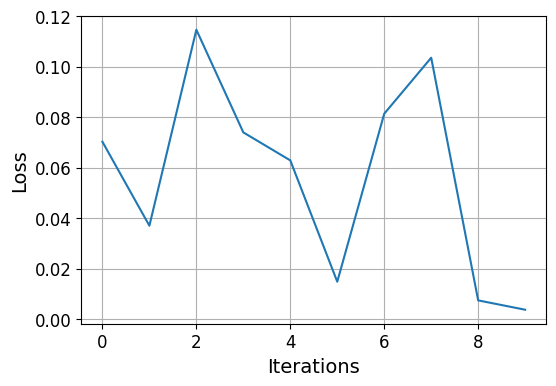

In [30]:
# SETTING 1
estimator1 = SGDClassifier(loss = 'log_loss',
                           eta0 = 0.01,
                           max_iter = 1,
                           warm_start = True,
                           learning_rate = 'constant',
                           alpha = 0,
                           random_state = 10)
loss = []
iterations = 10

for i in range(iterations):
  estimator1.fit(x_train_69, y_train_69)
  y_pred = estimator1.predict_proba(x_train_69)
  loss.append(log_loss(y_train_69, y_pred))

plt.figure(figsize=(6, 4))
plt.plot(np.arange(iterations), loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()

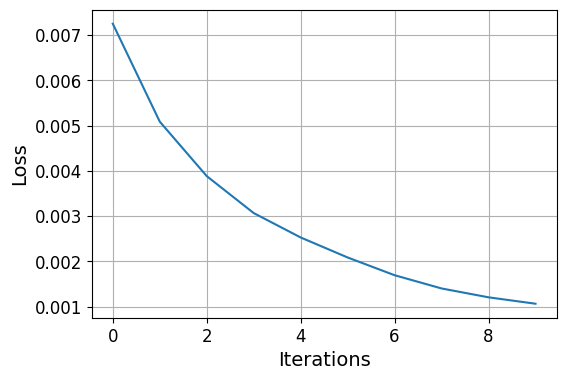

In [25]:
# SETTING 2
estimator2 = SGDClassifier(loss = 'log_loss',
                           eta0 = 1e-6,
                           max_iter = 1,
                           warm_start = True,
                           learning_rate = 'constant',
                           alpha = 0,
                           random_state = 10)
loss = []
iterations = 10

for i in range(iterations):
  estimator2.fit(x_train_69, y_train_69)
  y_pred = estimator2.predict_proba(x_train_69)
  loss.append(log_loss(y_train_69, y_pred))

plt.figure(figsize=(6, 4))
plt.plot(np.arange(iterations), loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()

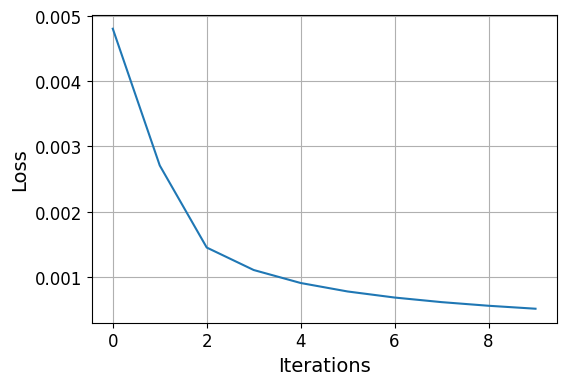

In [26]:
# SETTING 3
estimator3 = SGDClassifier(loss = 'log_loss',
                           eta0 = 0.01,
                           max_iter = 1,
                           warm_start = True,
                           learning_rate = 'constant',
                           alpha = 0,
                           random_state=10)
loss = []
iterations = 10
pipe_sgd3 = make_pipeline(StandardScaler(), estimator3)

for i in range(iterations):
  pipe_sgd3.fit(x_train_69, y_train_69)
  y_pred = pipe_sgd3.predict_proba(x_train_69)
  loss.append(log_loss(y_train_69, y_pred))

plt.figure(figsize=(6, 4))
plt.plot(np.arange(iterations), loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()

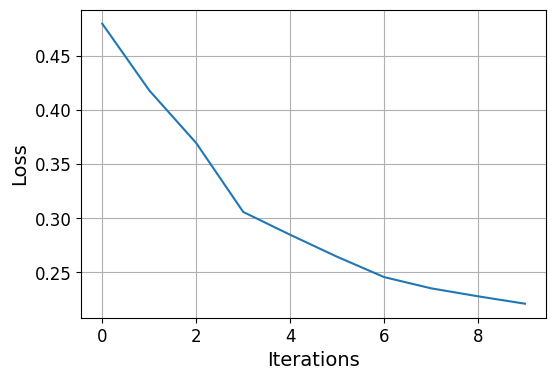

In [28]:
# SETTING 4
estimator4 = SGDClassifier(loss = 'log_loss',
                           eta0 = 0.01,
                           alpha = 0,
                           max_iter = 1,
                           warm_start = True,
                           learning_rate = 'invscaling',
                           power_t = 1,
                           random_state = 10)
loss = []
iterations = 10

for i in range(iterations):
  estimator4.fit(x_train_69, y_train_69)
  y_pred = estimator4.predict_proba(x_train_69)
  loss.append(log_loss(y_train_69, y_pred))

plt.figure(figsize = (6, 4))
plt.plot(np.arange(iterations), loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()

# Problem 5

Train the `LogisticRegression` model using `SGDClassifier()` with the following common settings.

```python
No Regularization
random_state : 10
Iteration : 30
```

Capture the loss for each iteration and plot the iteration vs loss curve. For which of the following settings, the iteration vs loss curve converged quickly to zero loss?

1. Set Learning rate : 0.01 and plot the curve and fit the model with `x_train_69 `
2. Set learning rate to 0.000001 and fit the model with `x_train_69 ` .
3. Keep the learning rate as 0.01. Scale the samples using StandardScaler() and fit the model with the pre-processed samples.
4. Use the "invscaling" stratagey for the learning rate with power_t = 1. Fit the model with x_train_69 (without pre-procesing).

Text(0, 0.5, 'Loss')

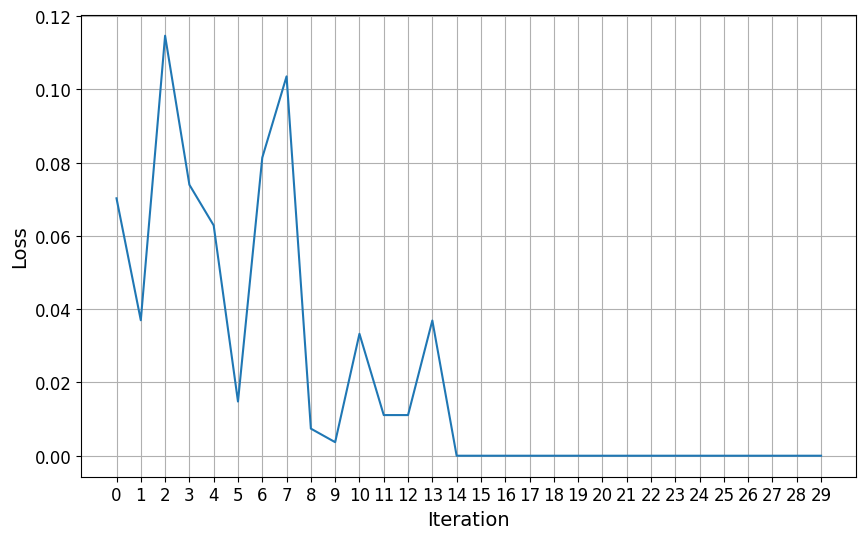

In [50]:
estimatorA = SGDClassifier(loss='log_loss',
                        penalty='l2',
                        max_iter=1,
                        warm_start=True,
                        eta0=0.01,
                        alpha=0,
                        learning_rate='constant',
                        random_state=10)
loss=[]
iterations= 30

for i in range(iterations):
  estimatorA.fit(x_train_69, y_train_69)
  y_pred = estimatorA.predict_proba(x_train_69)
  loss.append(log_loss(y_train_69, y_pred))

plt.figure(figsize = (10, 6))
plt.plot(np.arange(iterations), loss)
plt.xticks(ticks = np.arange(30), labels=np.arange(30))
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

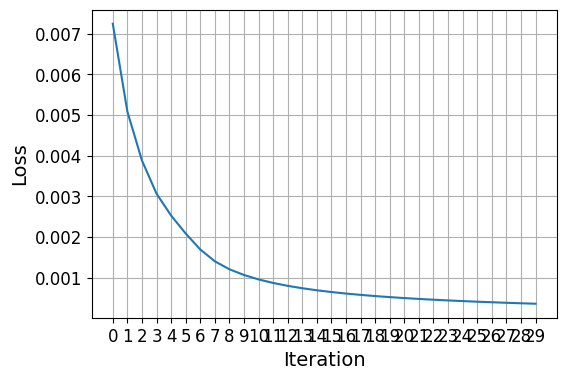

In [44]:
estimatorB = SGDClassifier(loss='log_loss',
                        penalty='l2',
                        max_iter=1,
                        warm_start=True,
                        eta0=0.000001,
                        alpha=0,
                        learning_rate='constant',
                        random_state=10)
loss = []
iterations = 30
for i in range(iterations):
  estimatorB.fit(x_train_69, y_train_69)
  y_pred = estimatorB.predict_proba(x_train_69)
  loss.append(log_loss(y_train_69, y_pred))

plt.figure(figsize = (6, 4))
plt.plot(np.arange(iterations), loss)
plt.xticks(ticks=np.arange(30), labels = np.arange(30))
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

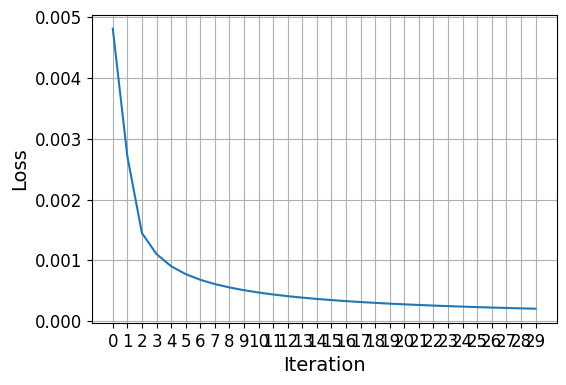

In [47]:
estimatorC = SGDClassifier(loss='log_loss',
                        penalty='l2',
                        max_iter=1,
                        warm_start=True,
                        eta0=0.01,
                        alpha=0,
                        learning_rate='constant',
                        random_state=10)
loss=[]
iterations= 30
pipe_sgd_C= make_pipeline(StandardScaler(), estimatorC)

for i in range(iterations):
  pipe_sgd_C.fit(x_train_69, y_train_69)
  y_pred = pipe_sgd_C.predict_proba(x_train_69)
  loss.append(log_loss(y_train_69, y_pred))

plt.figure(figsize = (6, 4))
plt.plot(np.arange(iterations), loss)
plt.xticks(ticks = np.arange(30), labels = np.arange(30))
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

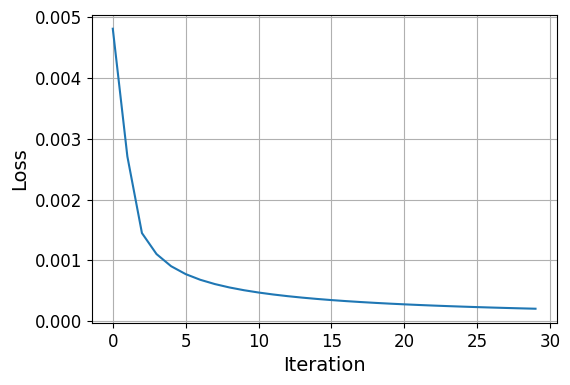

In [49]:
estimatorD = SGDClassifier(loss='log_loss',
                        penalty='l2',
                        max_iter=1,
                        warm_start=True,
                        eta0=0.01,
                        alpha=0,
                        power_t=1.0,
                        learning_rate='invscaling',
                        random_state=10)
Loss=[]
iterations= 30

for i in range(iterations):
  estimatorD.fit(x_train_69, y_train_69)
  y_pred = estimatorD.predict_proba(x_train_69)
  Loss.append(log_loss(y_train_69, y_pred))

plt.figure(figsize = (6, 4))
plt.plot(np.arange(iterations), loss)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Loss')

# Problem 6
Create the classifier with the following settings

1. No Regularization
2. eta0 = 0.5
3. learning_rate = 'invscaling'
4. power_t = 0.5
5. iterations = 10
6. Shuffle = True
7. random_state = 10

Train the classifier with `x_train_69`. Answer the following questions?

How many false positives (FP) are there in the predictions made on training samples?

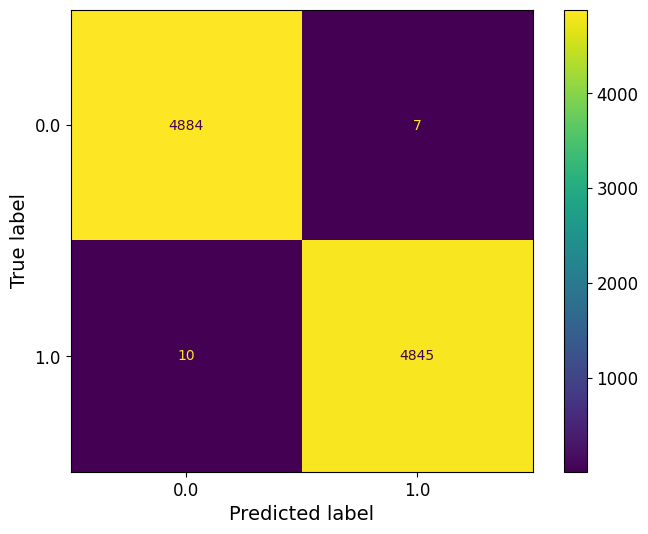

In [52]:
clf = SGDClassifier(loss = 'log_loss',
                    eta0 = 0.5,
                    alpha = 0,
                    learning_rate = 'invscaling',
                    power_t = 0.5,
                    max_iter = 10,
                    warm_start = False,
                    shuffle = True,
                    random_state = 10)
clf.fit(x_train_69, y_train_69)

y_pred = clf.predict(x_train_69)
ConfusionMatrixDisplay.from_predictions(y_train_69, y_pred)

# Problem 7

Load the train subset of `20newsgroups` data. Vectorize the data using `TfidfVectorizer`. Print the shape of the fitted and transformed dataset?

In [54]:
news_data = fetch_20newsgroups()
vectors = TfidfVectorizer().fit_transform(news_data.data)
vectors.shape

(11314, 130107)